In [2]:
#Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
Ad_data = pd.read_csv("C:/Users/Anvesh Bandi/Desktop/DATASETS/Social_Network_Ads.csv")

In [4]:
Ad_data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


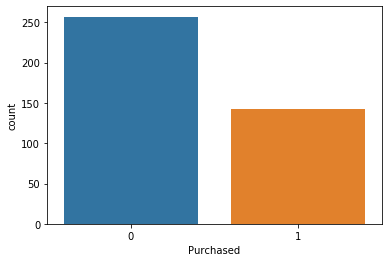

In [5]:
#See how many users have actually purshased
sns.countplot(x='Purchased',data = Ad_data)

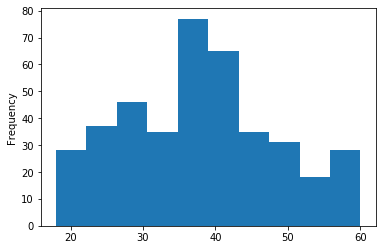

In [6]:
#Check which Age groups have higher frequecy in the daaset
Ad_data['Age'].plot.hist()

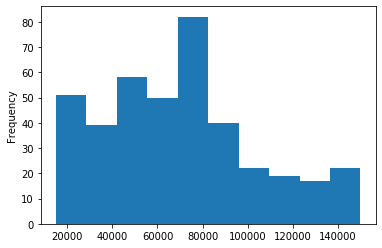

In [9]:
#plotting salary frequencies 
Ad_data['EstimatedSalary'].plot.hist()

In [10]:
#Summary of dataset
Ad_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


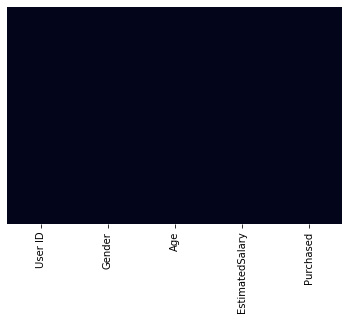

In [11]:
#Check for any Null values
Ad_data.isnull().sum()
#The heatmap helps to visualise, if there are any null values
sns.heatmap(Ad_data.isnull(), yticklabels=False, cbar=False)
#No null values in our Dataset

In [12]:
Ad_data=pd.get_dummies(Ad_data,columns=["Gender"])

In [13]:
Ad_data.drop('User ID',inplace = True, axis= 1)

In [14]:
Ad_data.head(5)

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1


In [13]:
x = Ad_data.drop('Purchased', axis = 1)
y = Ad_data['Purchased']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=1)

In [16]:
x_train["Age"]=pd.cut(x_train["Age"],bins=3,labels=False)
x_train["EstimatedSalary"]=pd.cut(x_train["EstimatedSalary"],bins=10,labels=False)

In [19]:
x_test["Age"]=pd.cut(x_test["Age"],bins=3,labels=False)
x_test["EstimatedSalary"]=pd.cut(x_test["EstimatedSalary"],bins=10,labels=False)


# LOGISTIC REGRESSION

In [143]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)

Accuracy of logistic regression classifier on test set: 83.33
confusion matrix of Logistic Regression:
[[72  9]
 [13 38]]
Sensitivity :  0.8888888888888888
Specificity :  0.7450980392156863
AUC_Logistic Regression: 0.8169934640522876
Accuracy of LOG with Cross Validation is: 67.56347717323328


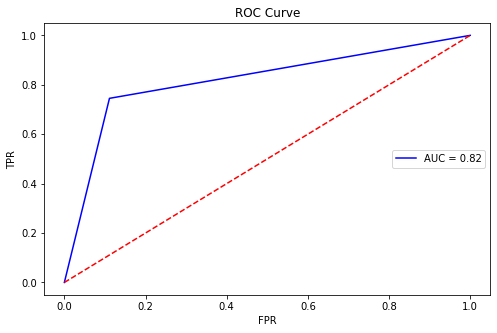

In [144]:
from sklearn.metrics import accuracy_score, roc_curve, auc

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_test, y_test)*100))

#Confusion Matrix
Confusion_Matrix_Log= confusion_matrix(y_test, predictions)
print('confusion matrix of Logistic Regression:')
print(Confusion_Matrix_Log)

sensitivity = Confusion_Matrix_Log_Reg[0,0]/(Confusion_Matrix_Log_Reg[0,0]+Confusion_Matrix_Log_Reg[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_Log_Reg[1,1]/(Confusion_Matrix_Log_Reg[1,0]+Confusion_Matrix_Log_Reg[1,1])
print('Specificity : ', specificity)


#Plotting ROC CURVE
import sklearn.metrics as metrics
fprlog, tprlog, _ = roc_curve(y_test, predictions)
auc_log=auc(fprlog, tprlog)
print("AUC_Logistic Regression:", auc_log)
roc_auc_log_reg=metrics.auc(fprlog,tprlog)

plt.figure(figsize=(8,5))
plt.title("ROC Curve")
plt.plot(fprlog,tprlog,"b",label="AUC = %0.2f" % roc_auc_log_reg)

plt.plot([0, 1],[0, 1],"r--")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend(loc="right")

from sklearn.model_selection import cross_val_score
accuracy_log_after_CV = cross_val_score(model, x, y, scoring='accuracy', cv = 10)
#print('CVS for log1 : ', accuracy_svc)
print("Accuracy of LOG with Cross Validation is:",accuracy_log_after_CV.mean() * 100)

# NAIVE BAYES

Accuracy of Naive Bayes on test set: 83.33
confusion matrix of Naive Bayes:
[[69 12]
 [10 41]]
Sensitivity :  0.8518518518518519
Specificity :  0.803921568627451
AUC_Naive Bayes: 0.8278867102396514
Accuracy of NB with Cross Validation is: 87.01297686053785


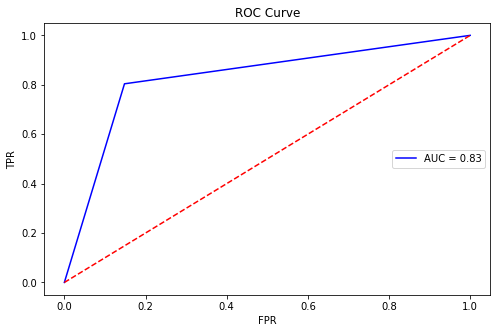

In [145]:
from sklearn.naive_bayes import GaussianNB
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(x_train, y_train)

# Predicting the Test set results
predictions_NB = Naive_Bayes.predict(x_test)
predictions_NB

print('Accuracy of Naive Bayes on test set: {:.2f}'.format(Naive_Bayes.score(x_test, y_test)*100))

#Confusion Matrix
Confusion_Matrix_NB= confusion_matrix(y_test, predictions_NB)
print('confusion matrix of Naive Bayes:')
print(Confusion_Matrix_NB)


#Sensitivity & Specificity
sensitivity = Confusion_Matrix_NB[0,0]/(Confusion_Matrix_NB[0,0]+Confusion_Matrix_NB[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_NB[1,1]/(Confusion_Matrix_NB[1,0]+Confusion_Matrix_NB[1,1])
print('Specificity : ', specificity)


import sklearn.metrics as metrics
fprNB, tprNB, _ = roc_curve(y_test, predictions_NB)
auc_NB=auc(fprNB, tprNB)
print("AUC_Naive Bayes:", auc_NB)

#ROC Curve
roc_auc_NB=metrics.auc(fprNB,tprNB)
plt.figure(figsize=(8,5))
plt.title("ROC Curve")
plt.plot(fprNB,tprNB,"b",label="AUC = %0.2f" % roc_auc_NB)

plt.plot([0, 1],[0, 1],"r--")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend(loc="right")

accuracy_NB_after_CV = cross_val_score(Naive_Bayes, x, y, scoring='accuracy', cv = 10)
#print('CVS for log1 : ', accuracy_svc)
print("Accuracy of NB with Cross Validation is:",accuracy_NB_after_CV.mean() * 100)



# KNN

Accuracy of KNN on test set: 85.61
confusion matrix of KNN:
[[69 12]
 [ 7 44]]
Sensitivity :  0.8518518518518519
Specificity :  0.8627450980392157
AUC_KNN: 0.8572984749455338
Accuracy of LOG with Cross Validation is: 77.71716697936209


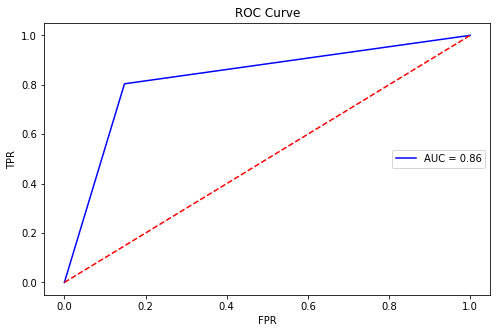

In [146]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
x_train = SC.fit_transform(x_train)
x_test = SC.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
KNN.fit(x_train, y_train)

# Predicting the Test set results
predictions_KNN = KNN.predict(x_test)

yknn = KNN.predict_proba(x_test)

print('Accuracy of KNN on test set: {:.2f}'.format(KNN.score(x_test, y_test)*100))

Confusion_Matrix_KNN= confusion_matrix(y_test, predictions_KNN)
print('confusion matrix of KNN:')
print(Confusion_Matrix_KNN)


sensitivity = Confusion_Matrix_KNN[0,0]/(Confusion_Matrix_KNN[0,0]+Confusion_Matrix_KNN[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_KNN[1,1]/(Confusion_Matrix_KNN[1,0]+Confusion_Matrix_KNN[1,1])
print('Specificity : ', specificity)


import sklearn.metrics as metrics
fprKNN, tprKNN, _ = roc_curve(y_test, predictions_KNN)
auc_KNN=auc(fprKNN, tprKNN)
print("AUC_KNN:", auc_KNN)

roc_auc_KNN=metrics.auc(fprKNN,tprKNN)

plt.figure(figsize=(8,5))
plt.title("ROC Curve")
plt.plot(fprNB,tprNB,"b",label="AUC = %0.2f" % roc_auc_KNN)

plt.plot([0, 1],[0, 1],"r--")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend(loc="right")

accuracy_KNN_after_CV = cross_val_score(KNN, x, y, scoring='accuracy', cv = 10)
#print('CVS for log1 : ', accuracy_svc)
print("Accuracy of LOG with Cross Validation is:",accuracy_KNN_after_CV.mean() * 100)

# SUPPORT VECTOR MACHINES

Accuracy of SVM on test set:83.33
confusion matrix of SVM:
[[69 12]
 [10 41]]
Sensitivity :  0.8518518518518519
Specificity :  0.803921568627451
AUC_SVM: 0.8278867102396514
Accuracy of LOG with Cross Validation is: 68.51282051282051


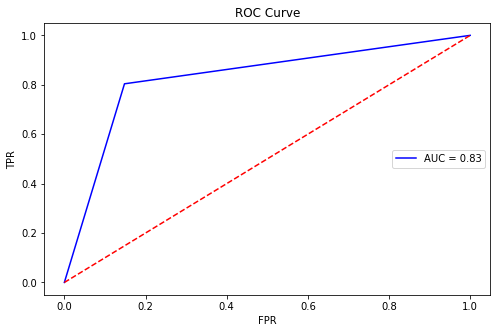

In [147]:
from sklearn.svm import SVC
SVM = SVC(kernel = 'rbf', random_state = 1, probability=True)
SVM.fit(x_train, y_train)

predictions_SVM = SVM.predict(x_test)

ysvm = SVM.predict_proba(x_test)

print('Accuracy of SVM on test set:{:.2f}'.format(SVM.score(x_test, y_test)*100))

#Confusion Matrix
Confusion_Matrix_SVM= confusion_matrix(y_test, predictions_SVM)
print('confusion matrix of SVM:')
print(Confusion_Matrix_SVM)


sensitivity = Confusion_Matrix_SVM[0,0]/(Confusion_Matrix_SVM[0,0]+Confusion_Matrix_SVM[0,1])
print('Sensitivity : ', sensitivity )

specificity = Confusion_Matrix_SVM[1,1]/(Confusion_Matrix_SVM[1,0]+Confusion_Matrix_SVM[1,1])
print('Specificity : ', specificity)

#Plotting ROC CURVE
import sklearn.metrics as metrics
fprSVM, tprSVM, _ = roc_curve(y_test, predictions_SVM)
auc_SVM=auc(fprSVM, tprSVM)
print("AUC_SVM:", auc_SVM)
roc_auc_SVM=metrics.auc(fprSVM,tprSVM)

plt.figure(figsize=(8,5))
plt.title("ROC Curve")
plt.plot(fprSVM,tprSVM,"b",label="AUC = %0.2f" % roc_auc_SVM)

plt.plot([0, 1],[0, 1],"r--")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend(loc="right")

accuracy_SVM_after_CV = cross_val_score(SVM, x, y, scoring='accuracy', cv = 10)
#print('CVS for log1 : ', accuracy_svc)
print("Accuracy of LOG with Cross Validation is:",accuracy_SVM_after_CV.mean()*100)

# Plotting ROCs 

Text(0.5, 0, 'TPR')

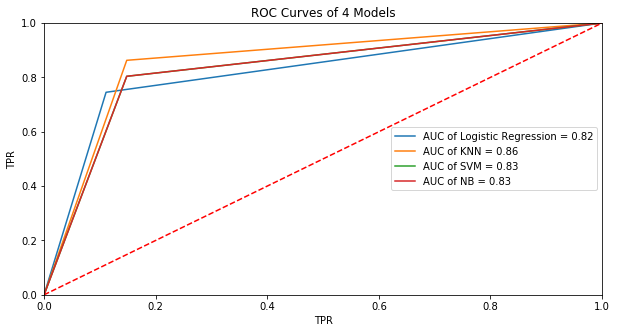

In [148]:
#Plotting ROC curves of 4 Models
roc_auc_log_reg=metrics.auc(fprlog,tprlog)
roc_auc_KNN=metrics.auc(fprKNN,tprKNN)
roc_auc_SVM=metrics.auc(fprSVM,tprSVM)
roc_auc_NB=metrics.auc(fprNB,tprNB)
plt.figure(figsize=(10,5))
plt.title("ROC Curves of 4 Models")
plt.plot(fprlog,tprlog,label="AUC of Logistic Regression = %0.2f" % roc_auc_log_reg)
plt.plot(fprKNN,tprKNN,label="AUC of KNN = %0.2f" % roc_auc_KNN)
plt.plot(fprSVM,tprSVM,label="AUC of SVM = %0.2f" % roc_auc_SVM)
plt.plot(fprNB,tprNB,label="AUC of NB = %0.2f" % roc_auc_NB)
plt.rcParams.update({'font.size': 10})
plt.legend(loc="right")
plt.plot([0, 1],[0, 1],"r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("TPR")
plt.xlabel("TPR")